<a href="https://colab.research.google.com/github/TashreefMuhammad/Kaggle_Titanic/blob/master/Step_by_Step_to_Solving_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle: Titanic

This is an approach to solving the "Titanic" problem from the Kaggle competitions.

Competition Link: https://www.kaggle.com/c/titanic

# Importing Components

We start by importing components that are needed to code. Here we import,
1. CSV
2. Numpy
3. TensorFlow
4. Keras
5. Files (to manipulate files)

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from google.colab import files

# Extracting Data

Next we upload required CSV files and extract data from the CSV files and store them in variables so that we can start doing calculations using them.

I will be using word embeddings to utilize the string inputs as less as possible. Letting TensorFlow do the heavy lifting for me.

In [9]:
uploaded=files.upload()

Saving train.csv to train.csv


In [0]:
def get_data(filename):
    with open(filename) as training_file:
        labels = []
        features = []
        reader = csv.reader(training_file, delimiter=',') 
        
        next(reader, None)
        
        for row in reader:
          # Lables will store status of survival of individual
          # Features will hold all the input features in string
          labels.append(row[1])
          features.append(row[2] + ' ' + row[3] + ' ' + row[4] + ' ' + row[5] + ' ' + row[6] + ' ' + row[7] + ' ' + row[8] + ' ' + row[9] + ' ' + row[10] + ' ' + row[11])
    return np.array(features), np.array(labels).astype(float)


features, labels = get_data('train.csv')

# Hence feature holds all the features and labels hold whether the person survived or not.

# Divide the Data into Test and Validation

Next we divide the data into test and validation. As there are only 891 data, I will split them for now into 95% training and the remaining 5% into validation.

I will also be shuffling the input sets to ensure variation in training and validation set.
The code is as below

So it divides into 846 data for training and 45 for testing

In [65]:
# Finding out required sizes for divition
total_data = features.shape[0]
train_size = int(total_data * 0.95)

# Shuffling the serials of inputs
rnd = np.arange(features.shape[0])
features = features[rnd]
labels = labels[rnd]

# Dividing Training and Validation Sets
training_data = features[:train_size]
training_label = labels[:train_size]
validation_data = features[train_size:]
validation_label = labels[train_size:]

# Just printing the sizes for ensurity
print("Shape of input examples: "+ str(features.shape))
print("Shape of training data: "+ str(training_data.shape))
print("Shape of validation dta: "+ str(validation_data.shape))

Shape of input examples: (891,)
Shape of training data: (846,)
Shape of validation dta: (45,)


# Tokenizing Features

Turn the inout strings into tokens so that we can implement DNN easily

In [0]:
# Hyperparameter values
vocab_size = 1000000
embedding_dim = 32

# Tokenizing training sentences
tokenizer = Tokenizer(vocab_size, oov_token = '<OOV>')
tokenizer.fit_on_texts(training_data)
word_index = tokenizer.word_index

# Finding out padded value of training set
train_sequences = tokenizer.texts_to_sequences(training_data)
train_padded = pad_sequences(train_sequences)

# Finding out padded value of validation set
validation_sequences = tokenizer.texts_to_sequences(validation_data)
validation_padded = pad_sequences(validation_sequences)

# Training

Now we train the model using our traing data.

In [71]:
# Traing the model
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

# Compiling model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['acc'])

# Fitting the model and keeping value in a variable to help plotting a graph in future
history = model.fit(train_padded, training_label, epochs = 5, verbose = 2, validation_data = (validation_padded, validation_label))

Epoch 1/5
27/27 - 10s - loss: 0.6687 - acc: 0.6158 - val_loss: 0.6345 - val_acc: 0.6222
Epoch 2/5
27/27 - 9s - loss: 0.6315 - acc: 0.6158 - val_loss: 0.5652 - val_acc: 0.8000
Epoch 3/5
27/27 - 10s - loss: 0.5557 - acc: 0.7080 - val_loss: 0.4613 - val_acc: 0.8444
Epoch 4/5
27/27 - 10s - loss: 0.4411 - acc: 0.8440 - val_loss: 0.3769 - val_acc: 0.8222
Epoch 5/5
27/27 - 9s - loss: 0.3426 - acc: 0.8759 - val_loss: 0.3861 - val_acc: 0.8667


# Plotting the Training

Plotting a graph to see how the training went

Text(0.5, 1.0, 'Training and validation loss')

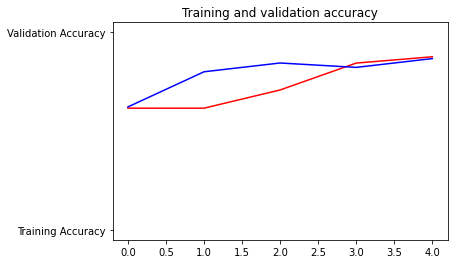

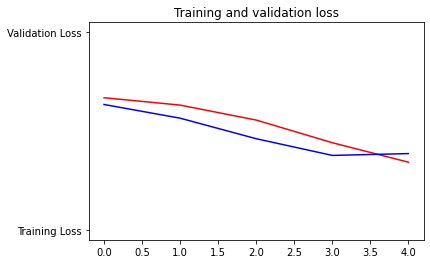

In [72]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Predicting Data

It is time to predict the data for totally unknown input features.
First we start with uploading and storing the features in a variable.

In [39]:
uploaded=files.upload()

Saving test.csv to test.csv


In [0]:
def get_test_data(filename):
    with open(filename) as training_file:
        features_test = []
        id_list = []
        reader = csv.reader(training_file, delimiter=',') 
        
        next(reader, None)
        
        for row in reader:
          # Storing the ID of Passengers to be used for later output
          id_list.append(row[0])
          # The test input column numbers vary, so in the new function, row index numbers will change
          # I will be cautious to ensure conversion remain in the same system as for training set for consistency
          features_test.append(row[1] + ' ' + row[2] + ' ' + row[3] + ' ' + row[4] + ' ' + row[5] + ' ' + row[6] + ' ' + row[7] + ' ' + row[8] + ' ' + row[9] + ' ' + row[10])
    return np.array(features_test), id_list


features_test, id_list = get_test_data('test.csv')

# Generating Prediction

Now to generate prediction of whether or not the person in question survived. We will predict it now.
The we will save it in a CSV file as our final output file.

In [0]:
# Generating the padded value of test features for prediction
output_sequences = tokenizer.texts_to_sequences(features_test)
output_padded = pad_sequences(output_sequences)

# Predict outcome
prediction = model.predict(output_padded)

# Store prediction in a CSV file
with open('output.csv', 'w', newline = '\n') as file:
  writer = csv.writer(file)
  writer.writerow(["PassengerId", "Survived"])
  for t in range (0, len(id_list)):
    writer.writerow([id_list[t], "1" if prediction[t] > 0.5 else "0"])

# Result

The grader gave me a 0.77033 score for designing this very simple solution. Which means I got around a 77.033% correct prediction in the test set.

However, the accuracy value might vary a little as there is a "Random" shuffling. But I do not expect the value to flactuate much just for such small shuffling.

This is a very very simple solution and most of the work done here was by TensorFlow. I coded it myself, and I also hope if anyone is taking idea from this please do so, but do not copy paste it without understanding.

I have learnt these and honestly speaking, some code snippets are from participating in the following course,
https://www.coursera.org/specializations/tensorflow-in-practice 
Hope this step by step explanation of my code helps. Thank you.